<a href="https://colab.research.google.com/github/aadi-kanwar/Neural-Network-Deep-Learning/blob/main/Object_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
# Parameters
batch_size = 32
classes = 2     # Dogs & Cats

In [3]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip = tf.keras.utils.get_file("cat_and_dogs_filtered.zip", url, extract=True)
base = os.path.join(os.path.dirname(zip), 'cats_and_dogs_filtered')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
dir_train = os.path.join(base, 'train')
dir_validation = os.path.join(base, 'validation')

In [5]:
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

validation_data = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen = train_data.flow_from_directory(
    dir_train,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_gen = train_data.flow_from_directory(
    dir_validation,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  #(Cat or Dog)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=25,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size
)

Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 287ms/step - accuracy: 0.6854 - loss: 0.6029 - val_accuracy: 0.6875 - val_loss: 0.5907
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6562 - loss: 0.6415 - val_accuracy: 0.8750 - val_loss: 0.5570
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - accuracy: 0.7283 - loss: 0.5459 - val_accuracy: 0.7016 - val_loss: 0.5701
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.8125 - loss: 0.4376 - val_accuracy: 0.6250 - val_loss: 0.6030
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.7537 - loss: 0.5119 - val_accuracy: 0.6996 - val_loss: 0.5802
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8438 - loss: 0.4145 - val_accuracy: 0.8750 - val_loss: 0.3724
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 288ms/step - accuracy: 0.7876 - loss: 0.4892 - val_accuracy: 0.6986 - val_loss: 0.5740
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7812 - loss: 0.5089 - val_accuracy: 

In [11]:
loss, accuracy = model.evaluate(validation_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.7361 - loss: 0.5783
Validation Loss: 0.5783
Validation Accuracy: 0.7360


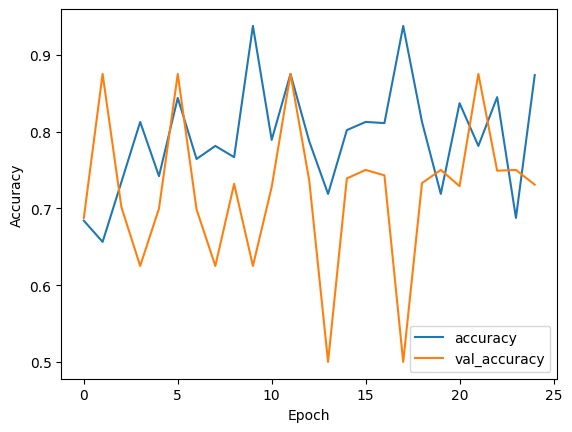

In [12]:
# Visualizing training results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


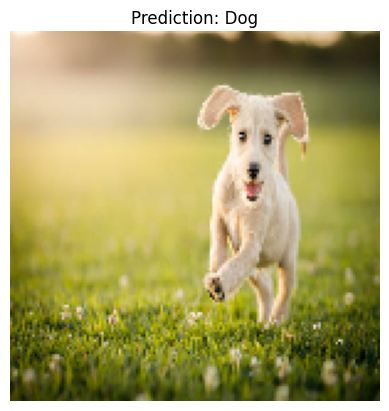

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


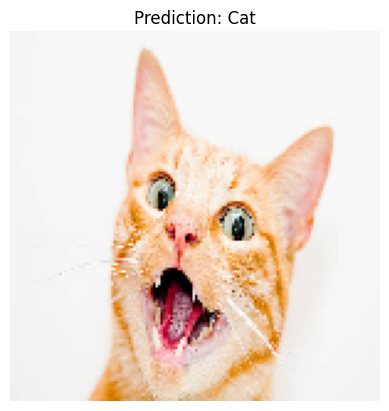

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


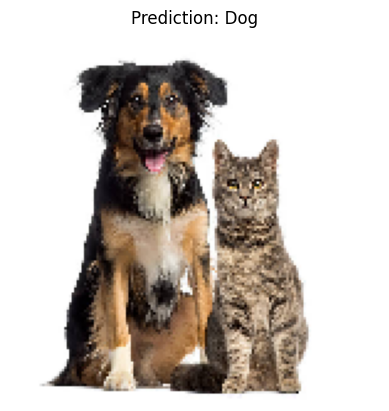

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


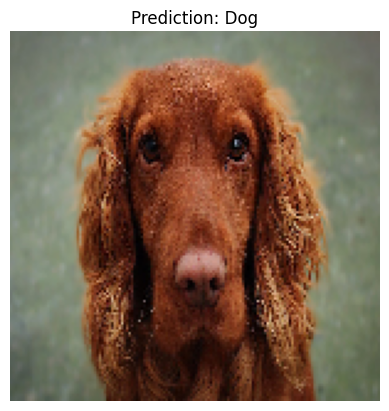

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


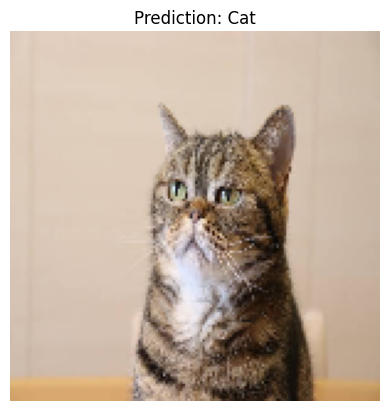

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


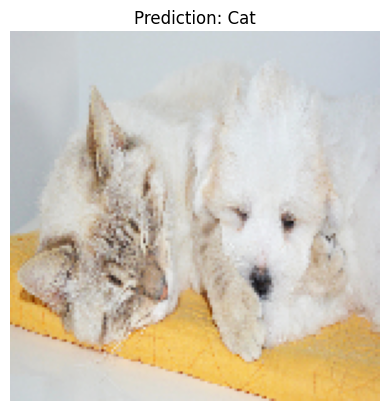

In [26]:
# Visualize predictions
def predict_and_visualize(image_path, model, target_size=(150, 150)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Prediction
    prediction = model.predict(img_array)
    plt.imshow(img)
    plt.axis('off')
    result = 'Dog' if prediction[0] > 0.5 else 'Cat'
    plt.title(f"Prediction: {result}")
    plt.show()

predict_and_visualize('/content/dog1.jpg', model)
predict_and_visualize('/content/cat1.jpg', model)
predict_and_visualize('/content/mix.jpg', model)
predict_and_visualize('/content/dog2.jpg', model)
predict_and_visualize('/content/cat2.jpg', model)
predict_and_visualize('/content/mix2.jpg', model)